In [6]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # ensure that plots are displayed inside the notebook
%matplotlib inline

In [5]:
# import dataset: RNAseq data of cancer
x_data = pd.read_csv('data.csv', index_col="Unnamed: 0")
y_data = pd.read_csv('labels.csv', index_col="Unnamed: 0")


<AxesSubplot:>

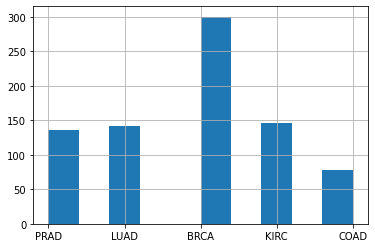

In [42]:
y_data.Class.hist()   # there is class imbalance

In [44]:
#x_data.isna()
#x_data.describe()
#all_zero = (x_data == 0).all()
x_data.head() # Do we need to normalize data?

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [36]:
#RFE recursive feature elimination feature selection --> apply on training and validation set!
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator=estimator, n_features_to_select=5, step=1)
selector = selector.fit(X,y)

selector.support_
selector.ranking_


array([1, 1, 1, 1, 1, 6, 4, 3, 2, 5])

In [8]:
from sklearn.tree import DecisionTreeClassifier
estimator = SVR(kernel="linear")
selector = RFE(estimator=SVR(kernel="linear"), n_features_to_select=434, step=100, verbose=0)
selector = selector.fit(x_data, y_data)

selector.support_
selector.ranking_


c:\users\daant\pycharmprojects\machinelearning\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ValueError: could not convert string to float: 'PRAD'

In [ ]:
from sklearn import svm

"""
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
"""
# fit the model
clf = svm.NuSVC(gamma='auto')
clf.fit(x_data, y_data)  #clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

In [48]:
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(x_data)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

MemoryError: Unable to allocate 125. MiB for an array with shape (801, 20531) and data type float64